In [1]:
import sys
sys.path.append('../algorithms/')

from CSOWP_SR import *
from ExpressionTree import *
from trainAlgorithm import *
import matplotlib.pyplot as plt

In [2]:
operators_op = {"+": lambda a,b: np.add(a,b), "*": lambda a,b: np.multiply(a,b)}
functions_op = {"exp": lambda a: np.exp(a), "tanh": lambda a: np.tanh(a)}
weights_op = {"exp": 4, "tanh": 4}

# F1

In [3]:
def f1(x):
    return 1.57 + 24.38*x

X = np.linspace(-1, 1, 1000)
y = f1(X)

In [4]:
# optimization_kind = "LS"
func = f1
x_range = [-1,1]
n_points = 1000
population = 40
generations = 10
const_range = (0,15)
dir_path = "Outputs/new_test/"
n_runs = 3
max_expression_size = 5

# Notes

# Training the model ===============================
for i in range(n_runs):
    print(f"-=-=-=-=-=-=-=-= Training for population {population} and generation {generations} - {dir_path[dir_path.find('/')+1:]} =-=-=-=-=-=-=-=-")
    SR = SymbolicRegression(generations, max_expression_size, max_population_size=population,
                            max_island_count=int(population/10), random_const_range=const_range,
                            operators=operators_op, functions=functions_op, weights=weights_op)
    SR.fit(np.c_[X], y, feature_names=["x"])

    start_time = time()
    output_AEG = SR.predict()
    end_time = time()
    data = SR.evaluate_tree(output_AEG.sexp)

    print(f"-=-=-=-=-=-=-= Done training for population {population} and generation {generations} - {dir_path[dir_path.find('/')+1:]} =-=-=-=-=-=-=-")

    # Writing the data =================================

    # In case the output is a constant function
    # if data.shape[0] == 1:
    #     data = np.array([data[0] for i in range(0, 1000)])

    # data = pd.DataFrame(np.c_[X, data], columns=["x", "y"])
    # data.to_csv(dir_path + f"/data/data-{population}.csv", sep=",", index=False)

    # graph = output_AEG.sexp.visualize_tree()
    # graph.render(dir_path + f"/trees/tree-{population}", format="svg")

    with open(dir_path + f"/trees/tree-{population}-{generations}-{i}", "wb") as file:
        pickle.dump(output_AEG.sexp, file)

    with open(dir_path + "/results.csv", "a") as file:
        file.write(f"{SR.fitness_score(output_AEG)},{population},{generations},{end_time - start_time},{i}\n")

In [19]:
X, y, operators, functions = testAlgorithm(func, x_range, n_points, dir_path, population, generations,
                                          max_expression_size=max_expression_size, normalize=True, const_range=const_range,
                                          ignore_warning=True, overwrite=True, n_runs=n_runs, 
                                          functions=functions_op, operators = operators_op)

-=-=-=-=-=-=-=-= Training for population 40 and generation 10 - new_test/ =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 40 and generation 10 - new_test/ =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 40 and generation 10 - new_test/ =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 40 and generation 10 - new_test/ =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 40 and generation 10 - new_test/ =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 40 and generation 10 - new_test/ =-=-=-=-=-=-=-


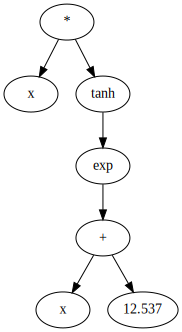

In [21]:
with open("Outputs/new_test/trees/tree-40-10-2", "rb") as file:
    tree = pickle.load(file)

    # smp_expr = tree.toSmpExpr(SR._operators, SR._functions, SR.custom_functions_dict)
    # display(smp_expr)
tree.visualize_tree()

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

SR.fit(scaler.fit_transform(np.c_[X]), scaler.fit_transform(np.c_[y]).reshape(-1), feature_names=["x"])

In [29]:
x = smp.symbols("x")

x*tanh(278451.729453361*exp(x))

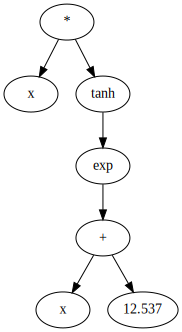

6.4249022944758185e-34

48.76*(0.5*x + 0.5)*tanh(459089.289212993*exp(0.5*x)) - 22.81

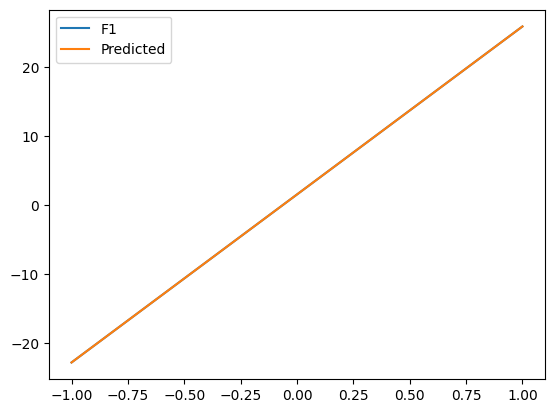

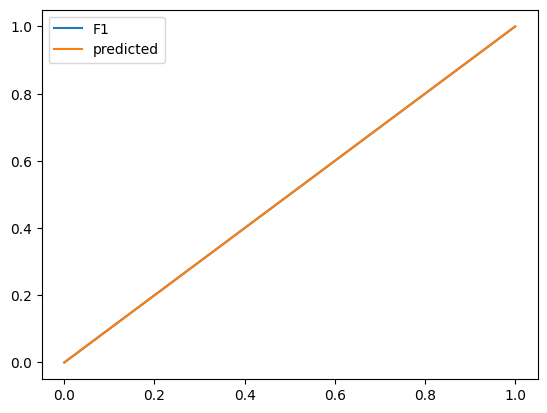

In [38]:
with open("Outputs/new_test/trees/tree-40-10-2", "rb") as file:
    tree = pickle.load(file)
    smp_expr = tree.toSmpExpr(SR._operators, SR._functions, SR.custom_functions_dict)
    display(smp_expr)
    
display(tree.visualize_tree())
display(SR.fitness_score(tree))

# ======================
smp_func, _ = tree.toFunc(SR._operators, SR._functions, SR.custom_functions_dict)


smp_expr = smp_expr.subs(x, (x - X.min())/(X.max() - X.min()))
# smp_expr = smp_expr.subs(x, (X1.max() - X1.min())*x + X1.min() )
smp_expr = (y.max() - y.min())*smp_expr + y.min()
# smp_expr = (y1_max - y1_min)*smp_expr + y1_min
# smp_expr = (smp_expr - y1.min())/(y1.max() - y1.min())
display(smp_expr)

smp_func = smp.lambdify(x, smp_expr)

Xr = np.linspace(-1, 1, 1000)
yr = smp_func(X)

plt.plot(Xr, yr, label="F1")
plt.plot(X, y, label="Predicted")
plt.legend()
plt.show()
plt.plot(scaler.fit_transform(np.c_[X]), scaler.fit_transform(np.c_[y]), label="F1")
plt.plot(scaler.fit_transform(np.c_[X]), scaler.fit_transform(np.c_[y]), label="predicted")
plt.legend()


# Plot Test

In [5]:
scaler = MinMaxScaler()

In [6]:
def f1(v):
    return 1.57 + 24.3*v

X = np.linspace(-1, 1, 1000)
y = f1(X)

X_scaled = scaler.fit_transform(np.c_[X])
y_scaled = scaler.fit_transform(np.c_[y]).reshape(-1)

In [7]:
np.mean((y_scaled - scaler.fit_transform(np.c_[y_pred]).reshape(-1))**2)

NameError: name 'y_pred' is not defined

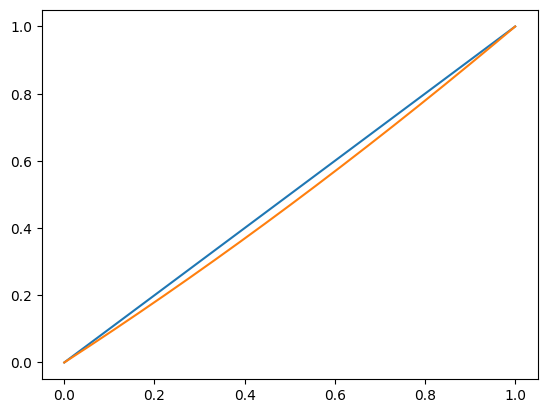

In [9]:
def r_func(x):
    return (x+7.722)**2

X_test = np.linspace(0, 1, 1000)
y_pred = r_func(X)

plt.plot(X_scaled, y_scaled)
plt.plot(X_test, scaler.fit_transform(np.c_[y_pred]))

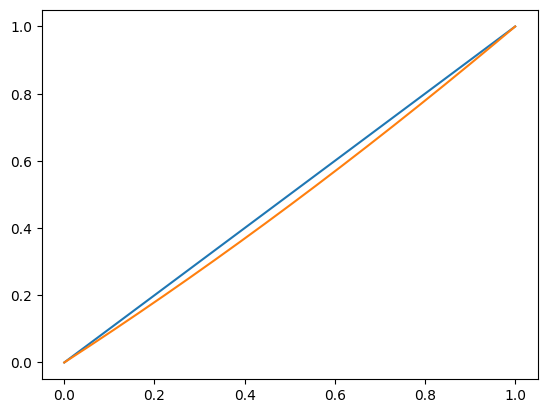

In [10]:
y_max = y_pred.max()
y_min = y_pred.min()
x_min = 0
x_max = 1

def nr_func(x):
    return ((x+7.722)**2 - y_min)/(y_max - y_min)
    # return (x+7.722)**2 * (y_max - y_min) + y_min

X_test = np.linspace(0, 1, 1000)
y_npred = nr_func(X)

plt.plot(X_scaled, y_scaled)
plt.plot(X_test, y_npred)

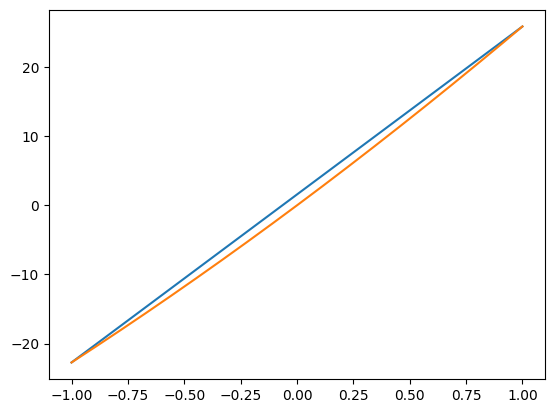

In [25]:
X_test = np.linspace(-1, 1, 1000)

# scaler.fit(np.c_[y])

def ur_func(x):
    return (((x+7.722)**2 - y_min)/(y_max - y_min))*(y.max()-y.min()) + y.min()

plt.plot(X, y)
plt.plot(X_test, ur_func(X_test))

# Fitness Evaluation 

In [30]:
operators_op = {"+": lambda a,b: np.add(a,b), "*": lambda a,b: np.multiply(a,b),
                "/": lambda a,b: np.divide(a,b), "-": lambda a,b: np.subtract(a,b)}
functions_op = {"sin": lambda a: np.sin(a), "cos": lambda a: np.cos(a),
                "square": lambda a: a**2, "cube": lambda a: a**3}
custom_functions_dict = {"cube": ["(", ")**3"], "square": ["(", ")**2"]}

In [33]:
def f1(v):
    return 1.57 + 24.3*v

X1 = np.linspace(-1, 1, 1000)
y1 = f1(X1)

In [53]:
SR = SymbolicRegression(10, functions=functions_op, operators=operators_op, custom_functions_dict=custom_functions_dict)

SR.fit(scaler.fit_transform(np.c_[X1]), scaler.fit_transform(np.c_[y1]).reshape(-1), feature_names=["x"])

(x + 7.722)**2

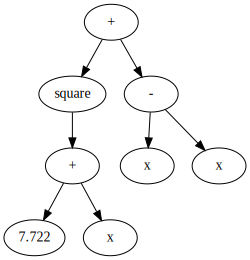

In [38]:
with open("Outputs/article_tests/LS/trees/tree-4000-10-1", "rb") as file:
    tree = pickle.load(file)
    smp_expr = tree.toSmpExpr(SR._operators, SR._functions, SR.custom_functions_dict)
    display(smp_expr)
tree.visualize_tree()

In [39]:
SR.fitness_score(tree)

2.618494352388886e-33

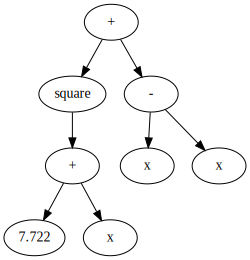

In [48]:
made_tree = ExpressionTree()
p_root = made_tree.add_root("+")
p_r = made_tree.add_right(p_root, "-")
made_tree.add_left(p_r, "x")
made_tree.add_right(p_r, "x")
p_l = made_tree.add_left(p_root, "square")
p = made_tree.add_left(p_l, "+")
made_tree.add_left(p, 7.722)
made_tree.add_right(p, "x")

made_tree.visualize_tree()

In [56]:
SR.fit(scaler.fit_transform(np.c_[X1]), scaler.fit_transform(np.c_[y1]).reshape(-1), feature_names=["x"])
SR.fitness_score(made_tree)

2.618494352388886e-33

In [55]:
SR.evaluate_tree(made_tree)

array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705, 0.04804805, 0.04904905,
       0.05005005, 0.05105105, 0.05205205, 0.05305305, 0.05405405,
       0.05505506, 0.05605606, 0.05705706, 0.05805806, 0.05905906,
       0.06006006, 0.06106106, 0.06206206, 0.06306306, 0.06406406,
       0.06506507, 0.06606607, 0.06706707, 0.06806807, 0.06906907,
       0.07007007, 0.07107107, 0.07207207, 0.07307307, 0.07407

In [57]:
SR.fit(np.c_[X1], y1, feature_names=["x"])
SR.fitness_score(made_tree)

183.79052228895563

In [66]:
string = made_tree.toString(SR._operators, SR._functions, SR.custom_functions_dict)
string

'(((7.722+x))**2+(x-x))'

In [76]:
def create_function_from_string(func_str):
    global_vars = {}
    exec(func_str, global_vars)
    func_name = func_str.strip().split('\n')[0].split()[1].split('(')[0]
    return global_vars[func_name]


In [77]:
di = {}
exec(f"""def f(x):
    return {string}""", di)
di["f"](X)

array([45.185284  , 45.21220292, 45.23912986, 45.26606482, 45.29300779,
       45.31995877, 45.34691778, 45.3738848 , 45.40085983, 45.42784288,
       45.45483395, 45.48183303, 45.50884013, 45.53585525, 45.56287838,
       45.58990953, 45.61694869, 45.64399587, 45.67105106, 45.69811428,
       45.7251855 , 45.75226475, 45.77935201, 45.80644728, 45.83355057,
       45.86066188, 45.8877812 , 45.91490854, 45.9420439 , 45.96918727,
       45.99633866, 46.02349806, 46.05066548, 46.07784092, 46.10502437,
       46.13221584, 46.15941532, 46.18662282, 46.21383834, 46.24106187,
       46.26829342, 46.29553298, 46.32278056, 46.35003616, 46.37729977,
       46.4045714 , 46.43185104, 46.4591387 , 46.48643438, 46.51373807,
       46.54104978, 46.5683695 , 46.59569724, 46.623033  , 46.65037677,
       46.67772856, 46.70508836, 46.73245618, 46.75983202, 46.78721587,
       46.81460774, 46.84200762, 46.86941552, 46.89683144, 46.92425537,
       46.95168732, 46.97912728, 47.00657527, 47.03403126, 47.06